## The python data stack

* Overview of the mainstream packages that are used in Python for data analysis
* A quick look at core packages
    * Numpy for fast array manipulation
    * Plotting with matplotlib

![./figures/math_ahead.jpg](./figures/math_ahead.jpg)

In [1]:
from IPython.display import Image

![./figures/scipy_stack.jpg](./figures/scipy_stack.jpg)

## Numpy

* The unified basis for all other data analysis tasks
* Provides the `array` datatype and associated methods
* Interfaces with `C` and `FORTRAN` libraries for speed
* https://docs.scipy.org/doc/numpy/reference/

## Matplotlib

* Provides plotting functions
* The basis for other libraries, for example `pandas` builds on it
* Not the only standard, many alternatives
    * http://seaborn.pydata.org/examples/
    * https://plot.ly/python/range-slider/
    * http://bokeh.pydata.org/en/latest/docs/gallery/candlestick.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-2, 10)
y = np.exp(-x)

plt.plot(x, y)

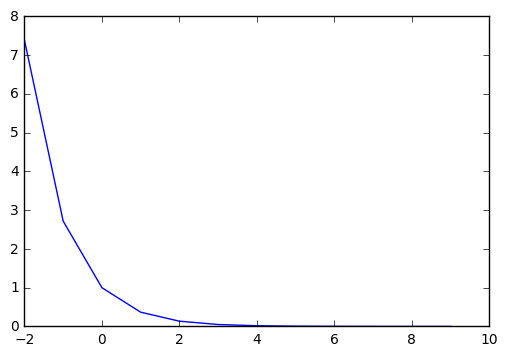

In [2]:
plt.show()

In [4]:
## magic command that imports `matplotlib` and `numpy` as `plt` and `np`
## and lets plot appear automatically

%pylab inline

Populating the interactive namespace from numpy and matplotlib


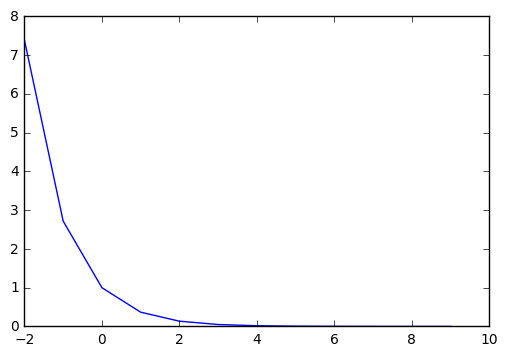

In [6]:
x = np.arange(-2, 10)
y = np.exp(-x)

plt.plot(x, y);

## Speed example

* Calculate $1 + \frac{1}{2} + \frac{1}{4} + \dots$

![./figures/geom.png](./figures/geom.png)

In [152]:
n = 100000

def loop(n):
    
    s = int()
    for i in range(n):
        s = s + 1 / (2 ** i)

    return s
        
loop(n) # use %time to find out exactly how long it took

2.0

In [148]:
np.arange(0, n)

array([    0,     1,     2, ..., 99997, 99998, 99999])

In [149]:
2 ** np.arange(0, n)

array([                   1,                    2,                    4,
       ..., -9223372036854775808, -9223372036854775808,
       -9223372036854775808])

In [150]:
1 / (2 ** np.arange(0, n))

array([  1.00000000e+00,   5.00000000e-01,   2.50000000e-01, ...,
        -1.08420217e-19,  -1.08420217e-19,  -1.08420217e-19])

In [147]:
%time (1 / (2 ** np.arange(0, n))).sum()

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 4.45 ms


1.9999999999999893

In [139]:
## array creation

In [ ]:
## zeros, arange and linspace

In [30]:
np.linspace(1, 4, 10), np.arange(1, 4, .4)

(array([ 1.        ,  1.33333333,  1.66666667,  2.        ,  2.33333333,
         2.66666667,  3.        ,  3.33333333,  3.66666667,  4.        ]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8]))

In [37]:
np.arange(1, 40)[1::-1]

array([2, 1])

In [ ]:
## array indices

np.arange()

In [ ]:
## ufuncs

In [ ]:
## shape

## Exercises

Use `plt.plot`, `plt.title`, `np.sin` 

* Plot $y = sin(x)$.
* Plot $x^2$, $x^3$, $x^4$, $x^5$ and $x^6$ in the same figure. Include a legend. 



### `np.random`

In [46]:
np.random.normal(0, 1)

0.47298583148997897

In [45]:
## seed random functions

np.random.seed(12)

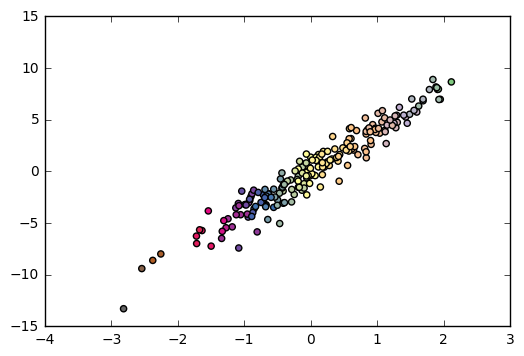

In [94]:
x = np.random.normal(0, 1, 200)
y = 4 * x  + np.random.normal(0, 1, 200)
c = x + np.random.normal(0, 1, 200) * .1 + 100

plt.scatter(x, y, c=c, cmap=plt.cm.Accent_r)

In [96]:
import statsmodels.api as sm

model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     2990.
Date:                Thu, 01 Dec 2016   Prob (F-statistic):          7.84e-122
Time:                        13:41:34   Log-Likelihood:                -279.95
No. Observations:                 200   AIC:                             561.9
Df Residuals:                     199   BIC:                             565.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.9727      0.073     54.677      0.000         3.829     4.116
==============================================================================
Omnibus:                       11.264   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.910
Skew:                          -0.502   Prob(JB):                      0.00259
Kurtosis:                       3.648   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Applied log-transform to sigma and added transformed sigma_log_ to model.
INFO:pymc3:Applied log-transform to sigma and added transformed sigma_log_ to model.
Assigned NUTS to sigma_log_
INFO:pymc3:Assigned NUTS to sigma_log_
Assigned NUTS to alpha
INFO:pymc3:Assigned NUTS to alpha
100%|██████████| 500/500 [00:00<00:00, 1608.06it/s]


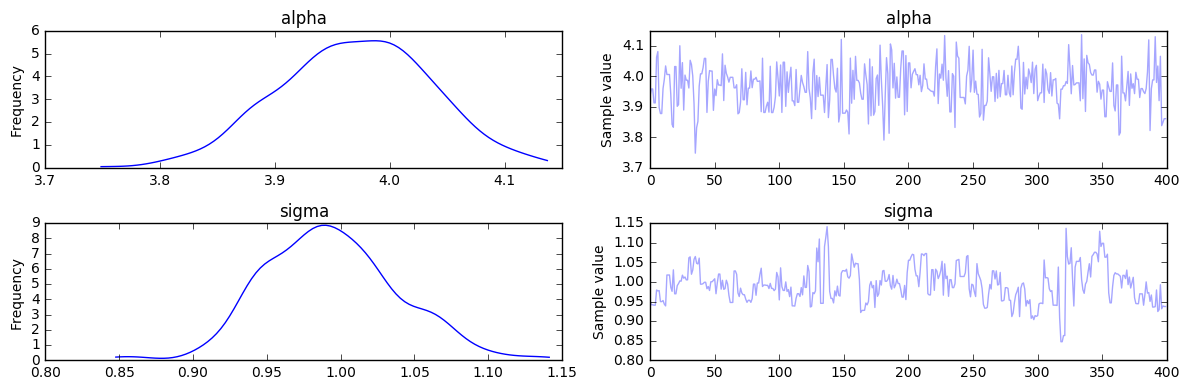

In [100]:
import pymc3 as pm

with pm.Model():
    
    sigma = pm.HalfNormal('sigma', 10)
    alpha = pm.Normal('alpha', 0, 10)
    obs = pm.Normal('obs', mu=alpha*x, sd=sigma, observed=y)

    trace = pm.sample(500)
    
pm.traceplot(trace[100:]);

In [ ]:
## multiple plots and using plot legend

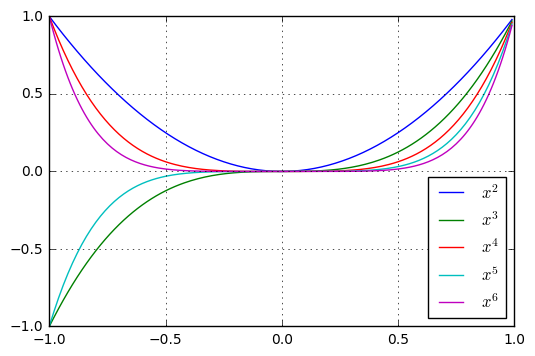

In [146]:
x = np.arange(-1, 1, .01)

for exp in range(2, 7):
    
    plt.plot(x, x ** exp, label = "$x^{}$".format(exp))

plt.grid()
plt.legend(loc='lower right')

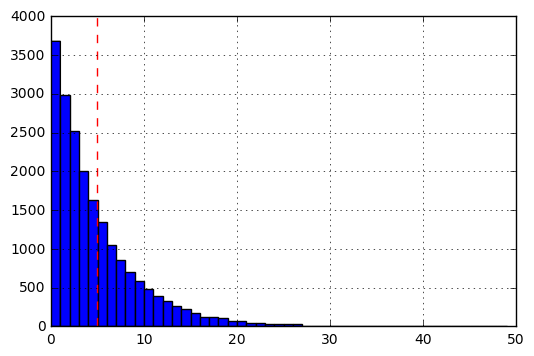

In [87]:
samples = np.random.exponential(5, 20000)

plt.hist(samples, bins=np.arange(0, 50, 1));
plt.axvline(samples.mean(), ls='--', c='r')
plt.grid()

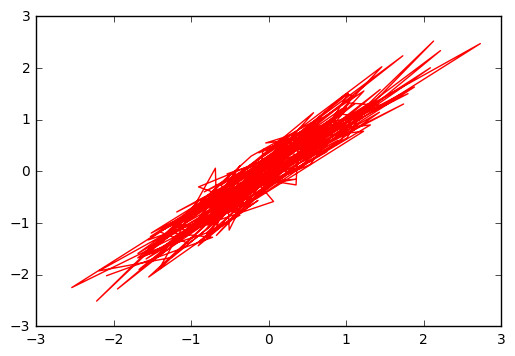

In [55]:
plt.plot(x, y, c='r')

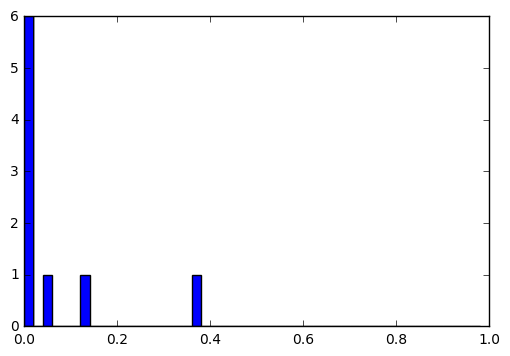

In [24]:
plt.hist(y, bins=np.arange(0, 1, .02));

In [6]:
x = np.arange(-1, 1, .01)
y = x ** 2

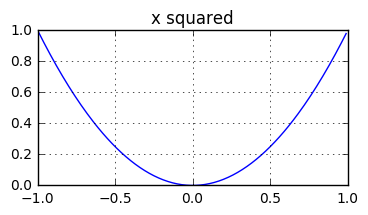

In [15]:
plt.figure(figsize=(4, 2))
plt.plot(x, y)
plt.grid(True)
plt.title("x squared")

## Exercises

Use `plt.scatter`



Use `plt.hist`

* Plot a density for the normal distribution, give it an appropriate name and save the file to your desktop 
* Same for a distribution that is the sum of two normal distributions with means 2 and 5, and standard deviations of 1 and 4


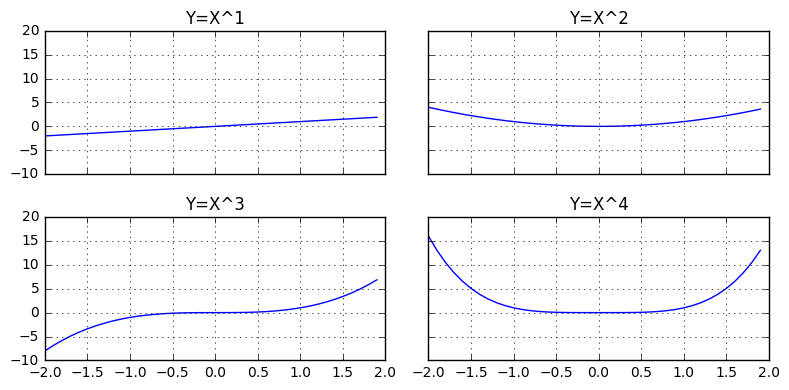

In [22]:
x = np.arange(-2, 2, .1)

fig, rows = plt.subplots(2, 2, figsize=(8, 4), sharex=True, sharey=True)

for r_index, row in enumerate(rows):
    for c_index, ax in enumerate(row):
        
        power = ((r_index * 2) + (c_index + 1))
        
        ax.plot(x, x ** power)
        ax.grid(True)
        ax.set_title('Y=X^{}'.format(power))
        
plt.tight_layout()